In [1]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show as rio_show
from shapely.geometry import Polygon
import xarray as xr

In [2]:
bathy = xr.open_dataset('~/Documents/MEOPAR/grid/bathymetry_201702.nc')

In [3]:
(lon1, lat1, lon2, lat2) = (-123.37875304295405, 48.40584296402443, -123.36382650622767, 48.42076950075082)

In [4]:
lats = [lat1, lat2, lat2, lat1, lat1]
lons = [lon1, lon1, lon2, lon2, lon1]

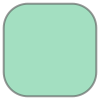

In [28]:
biggerpolygon = Polygon([[lons[i], lats[i]] for i in range(len(lats))])
dx = (1.55-1)*(np.abs(biggerpolygon.bounds[2] - biggerpolygon.bounds[0]))
evenbiggerpolygon = Polygon(biggerpolygon.buffer(dx).exterior)
dx = (1.65-1)*(np.abs(biggerpolygon.bounds[2] - biggerpolygon.bounds[0]))
monstorpolygon = Polygon(biggerpolygon.buffer(dx).exterior)
evenbiggerpolygon

<ipython-input-10-4e809c97c5dc>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry)


(48.4, 48.5)

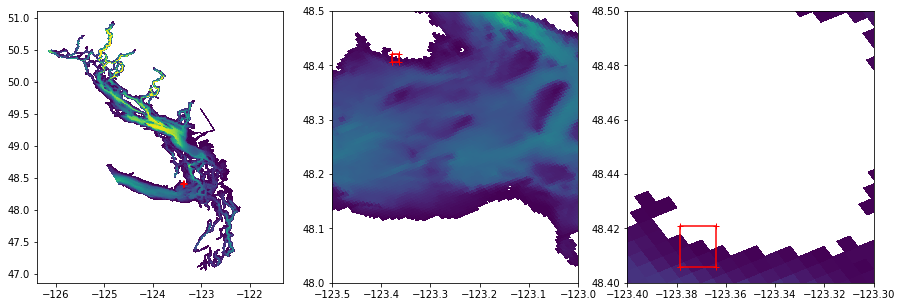

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax in axs:
    ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry)
for ax in axs:
    ax.plot(lons, lats, 'r+-')

axs[1].set_xlim(-123.5, -123)
axs[1].set_ylim(48., 48.5)
axs[2].set_xlim(-123.4, -123.3)
axs[2].set_ylim(48.4, 48.5)

In [11]:
ais_tracks = geopandas.read_file('oct2/cruise_2018_04.shp')
ais_tracks

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,geometry
0,229857000.0,2018-04-30 19:02:28,2018-04-30 19:10:53,293,"LINESTRING (-127.72362 46.88697, -127.67540 46..."
1,229857000.0,2018-04-30 19:10:53,2018-04-30 19:15:22,293,"LINESTRING (-127.67540 46.91770, -127.65102 46..."
2,229857000.0,2018-04-30 19:15:22,2018-04-30 19:19:52,293,"LINESTRING (-127.65102 46.93506, -127.62662 46..."
3,229857000.0,2018-04-30 19:19:52,2018-04-30 19:24:40,293,"LINESTRING (-127.62662 46.95226, -127.60060 46..."
4,229857000.0,2018-04-30 19:24:40,2018-04-30 19:26:56,293,"LINESTRING (-127.60060 46.97074, -127.58817 46..."
...,...,...,...,...,...
22905,311109000.0,2018-04-21 08:32:05,2018-04-21 08:33:17,259,"LINESTRING (-125.48182 46.86162, -125.48215 46..."
22906,311109000.0,2018-04-21 08:33:17,2018-04-21 08:34:30,259,"LINESTRING (-125.48215 46.85447, -125.48168 46..."
22907,311109000.0,2018-04-21 08:34:34,2018-04-21 08:34:47,259,"LINESTRING (-125.48168 46.84667, -125.48247 46..."
22908,311109000.0,2018-04-21 08:34:47,2018-04-21 08:34:53,259,"LINESTRING (-125.48247 46.84551, -125.48252 46..."


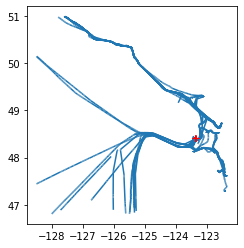

In [12]:
ais_tracks[:].plot()
plt.plot(lons, lats, 'r+-')

<ipython-input-31-113f3e04683a>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry)


(48.35, 48.45)

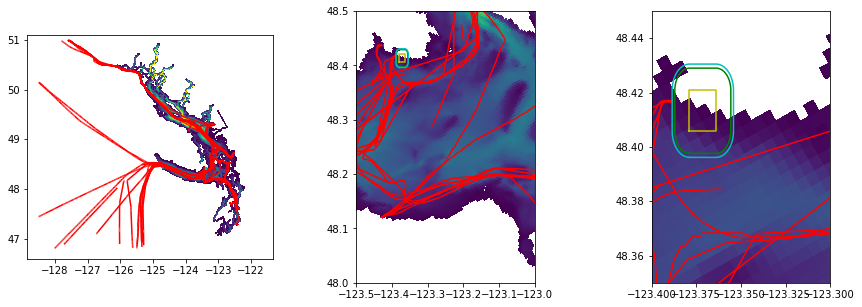

In [31]:
box2x, box2y = evenbiggerpolygon.exterior.coords.xy
BBox2x, BBox2y = monstorpolygon.exterior.coords.xy
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax in axs:
    ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry)
for ax in axs:
    ais_tracks[:].plot(ax=ax,color='r')
    ax.plot(lons, lats, 'y-')
    ax.plot(box2x, box2y, 'g-')
    ax.plot(BBox2x, BBox2y, 'c-')
    

axs[1].set_xlim(-123.5, -123)
axs[1].set_ylim(48., 48.5)
axs[2].set_xlim(-123.4, -123.3)
axs[2].set_ylim(48.35, 48.45)

In [21]:
innerdata = geopandas.read_file('oct2/cruise_2018_04.shp', bbox=biggerpolygon)

In [22]:
innerdata

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,geometry


In [32]:
biggerinnerdata = geopandas.read_file('oct2/cruise_2018_04.shp', bbox=monstorpolygon)

In [33]:
biggerinnerdata

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,geometry
0,244128000.0,2018-04-12 00:43:57,2018-04-12 00:46:10,285,"LINESTRING (-123.39060 48.41713, -123.38835 48..."
1,244128000.0,2018-04-12 01:07:09,2018-04-12 01:08:32,285,"LINESTRING (-123.38835 48.41667, -123.38937 48..."
2,244128000.0,2018-04-12 06:01:11,2018-04-12 06:02:29,285,"LINESTRING (-123.38835 48.41667, -123.38939 48..."
3,244128000.0,2018-04-12 06:02:29,2018-04-12 06:04:11,285,"LINESTRING (-123.38939 48.41706, -123.38835 48..."
4,244128000.0,2018-04-12 06:31:11,2018-04-12 06:32:33,285,"LINESTRING (-123.38835 48.41667, -123.38936 48..."
5,244128000.0,2018-04-12 06:32:33,2018-04-12 06:34:10,285,"LINESTRING (-123.38936 48.41710, -123.38835 48..."
6,244128000.0,2018-04-12 06:37:11,2018-04-12 06:38:30,285,"LINESTRING (-123.38835 48.41667, -123.38933 48..."
7,244128000.0,2018-04-12 06:38:30,2018-04-12 06:40:10,285,"LINESTRING (-123.38933 48.41709, -123.38835 48..."
8,244128000.0,2018-04-12 06:43:11,2018-04-12 06:47:31,285,"LINESTRING (-123.38835 48.41667, -123.38937 48..."
9,311109000.0,2018-04-20 13:39:34,2018-04-20 13:40:26,259,"LINESTRING (-123.38900 48.41712, -123.38835 48..."


In [42]:
dataset = rasterio.open("oct2/cruise_2018_04.tif")

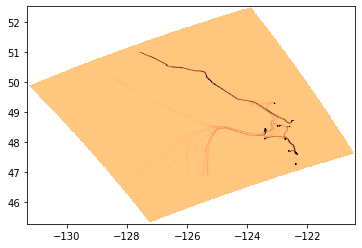

In [43]:
rio_show(dataset, cmap='copper_r', vmax=0.2);

<ipython-input-46-f8646c09b263>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry)


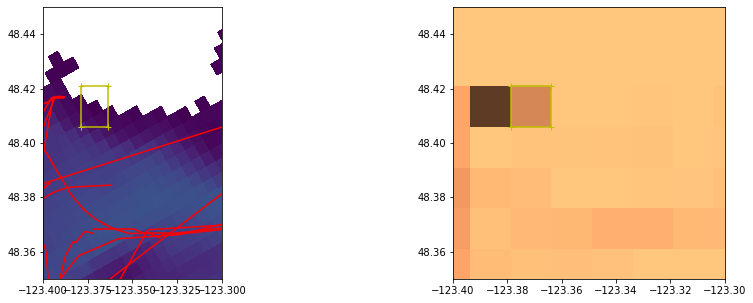

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry)

rio_show(dataset, ax=axs[1], cmap='copper_r', vmax=1, vmin=0);
ais_tracks[:].plot(ax=axs[0],color='r')

for ax in axs:
    ax.plot(lons, lats, 'y+-')
    ax.set_xlim(-123.4, -123.3)
    ax.set_ylim(48.35, 48.45)